<a href="https://colab.research.google.com/github/Marubii/Projects/blob/main/TRIPADVISOR_TRAVEL_REVIEWS_Coding_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ABSTRACT
The dataset "Tripadvisor travel reviews", imported from UCI Machine Learning Repository, represents the preferences of a group of users on different types of leisure and entertainment activities in East Asia, such as museums, restaurants, beaches, theaters and many more. The dataset contains 980 rows and 11 columns, with each row representing a user and each column representing a type of activity. Ratings are expressed as numerical values indicating the user's preference for a particular type of experience, with a rating of 1 indicating a low preference and a rating of 3 indicating a very high preference (considering that the maximum is 4). 

In general this dataset could be used to identify people's preferences and consumption trends in different entertainment activities, as well as to create customised recommendations for users based on their preferences. This could be mostly useful for companies that operate in the hospitality sector, as for example travel agencies, and wish to offer personalised experiences to their customers.

So, the objective of the analysis is to understand which activities have been most appreciated by users, considering all the various categories presented in the dataset. For example, we will show how the degree of appreciation of an activity can be influenced by other experiences most preferred by users. Furthermore, we will explore the relationships between users' opinions, ranking who among them gave higher ratings and who gave lower ratings. 


## INTRODUCTION
Ou analysis is divided into three sections: in the first section, we will describe the content of the dataset; in the second section, we will present results such as mean, min, max, mode, with some graphical representations; finally, in the third section, we will present the results of the analysis using different algorithms. In this way, we hope to provide useful information for travel agencies and other companies in the tourism industry who want to improve their customers' experience.


### DATA

First of all, we have imported the dataset and described how data are structured, as well as its feautures and which of them could be the more interesting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/tripadvisor_review.csv')

In [ ]:
df

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [ ]:
# We proceeded to rename the columns with the relative activities
df = df.rename(columns={'Category 1':'Art galleries', 'Category 2':'Dance clubs', 'Category 3':'Juice bars', 'Category 4': 'Restaurants', 'Category 5': 'Museums', 'Category 6':'Resorts', 'Category 7': 'Parks/Picnic spots', 'Category 8':'Beaches', 'Category 9':'Theaters', 'Category 10': 'Religious institutions'})
print(df)

      User ID  Art galleries  Dance clubs  Juice bars  Restaurants  Museums  \
0      User 1           0.93         1.80        2.29         0.62     0.80   
1      User 2           1.02         2.20        2.66         0.64     1.42   
2      User 3           1.22         0.80        0.54         0.53     0.24   
3      User 4           0.45         1.80        0.29         0.57     0.46   
4      User 5           0.51         1.20        1.18         0.57     1.54   
..        ...            ...          ...         ...          ...      ...   
975  User 976           0.74         1.12        0.30         0.53     0.88   
976  User 977           1.25         0.92        1.12         0.38     0.78   
977  User 978           0.61         1.32        0.67         0.43     1.30   
978  User 979           0.93         0.20        0.13         0.43     0.30   
979  User 980           0.93         0.56        1.13         0.51     1.34   

     Resorts  Parks/Picnic spots  Beaches  Theaters

ATTRIBUTE INFORMATION

Attribute 1 : Unique user id

Attribute 2 : Average user feedback on art galleries

Attribute 3 : Average user feedback on dance clubs

Attribute 4 : Average user feedback on juice bars

Attribute 5 : Average user feedback on restaurants

Attribute 6 : Average user feedback on museums

Attribute 7 : Average user feedback on resorts

Attribute 8 : Average user feedback on parks/picnic spots

Attribute 9 : Average user feedback on beaches

Attribute 10 : Average user feedback on theaters

Attribute 11 : Average user feedback on religious institutions

In [ ]:
df.isna().sum #To check for missing values in the dataset

<bound method NDFrame._add_numeric_operations.<locals>.sum of      User ID  Art galleries  Dance clubs  Juice bars  Restaurants  Museums  \
0      False          False        False       False        False    False   
1      False          False        False       False        False    False   
2      False          False        False       False        False    False   
3      False          False        False       False        False    False   
4      False          False        False       False        False    False   
..       ...            ...          ...         ...          ...      ...   
975    False          False        False       False        False    False   
976    False          False        False       False        False    False   
977    False          False        False       False        False    False   
978    False          False        False       False        False    False   
979    False          False        False       False        False    False   

 

In [ ]:
df.dtypes #To find the data type of each column

User ID                    object
Art galleries             float64
Dance clubs               float64
Juice bars                float64
Restaurants               float64
Museums                   float64
Resorts                   float64
Parks/Picnic spots        float64
Beaches                   float64
Theaters                  float64
Religious institutions    float64
dtype: object

As anticipated in the abstract, we can observe that the dataset is composed by 980 rows and 11 columns, each row corresponding to a traveler's review, wehereas each column to an activity/category, except the first one which indicates the user id.
Travelers have reviewed using a range of values between 0 and 4: 0(Terrible), 1(Poor), 2(Average), 3(Very Good), 4(Excellent), and an average rating is used against each category per user. Of course, where there is a higher value, it suggests a greater preference. Finally, there are no missing values in any of the categories. 

In general, the dataset contains the following interesting feautures:

-User ratings: represent the main information in the dataset and can be used to understand which activities or places are preferred by users and which are less popular.

-The variety of activities or places rated: the dataset includes ratings for different types of activities, such as restaurants, museums, beaches and picnic spots. This diversity can be useful for understanding users' tastes and preferences in general.

-The user identifier: each row in the dataset corresponds to a different user, which can be useful for analysing the differences between the ratings of different users and identifying any common trends or patterns.

-The rating scale: the rating scale used is between 0 and 3.21, which can be useful to understand if users tend to give very high or low ratings, or if they are more likely to give intermediate ratings.

### VISUAL DISTRIBUTION OF VALUES

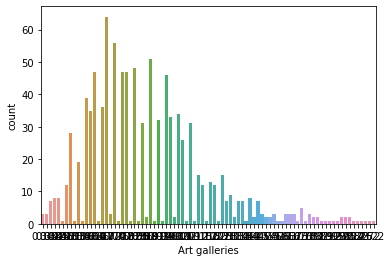

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Art galleries', data=df)
plt.show()

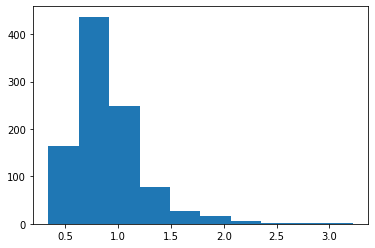

In [ ]:
plt.hist(df['Art galleries'])
plt.show()

The above graphs are used to show the distribution of values for each column/activity. The first one is a bar graph of reviews; the second one is an histogram and in both cases we represented the activity "Art Galleries", but they can be plotted for each activity.

### METHODOLOGY
To study the data, we decided to approach different algorithms:

1)K-means clustering: used for clustering problems where the goal is to group similar data points together based on their characteristics. We chose it to better understand the data in general, because the clusters created by this algorithm are easy to interpret.

2)Linear Regression: is a method of statistical analysis used to examine the relationship between a dependent variable (also known as response variable) and one or more independent variables (also known as predictor variables). We decided to use it because it is simple, allows us to understand the role that each independent variable plays in the prediction of the dependent variable, is reliable for making predictions and can be applied to datasets of any size.

3)PCA (Principal Component Analysis): is a technique for reducing the dimensionality of a dataset while retaining most of the variation in the data. To get a better understanding of the relationships among the categories of our dataset, principal component analysis (PCA) is very useful to reduce the dimensionality of the dataset and identify the most important features, the reason why we decided to use it.

## DATA ANALYSIS

### PRELIMINARY INVESTIGATION
The preliminary analysis reveals that the places best rated by users are parks/picnic areas (average rating of 3.18), followed by beaches (average rating of 2.83) and religious institutions (average rating of 2.79). In addition, a certain variability in user ratings can be observed, with some categories of actvities showing greater dispersion than others.

In [ ]:
df.describe() #To perform a general statistical analysis of the dataset

,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/Picnic spots,Beaches,Theaters,Religious institutions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [ ]:
means = df.mean(axis=0)
sorted_means = means.sort_values(ascending=False)
print(sorted_means)

Parks/Picnic spots        3.180939
Beaches                   2.835061
Religious institutions    2.799224
Resorts                   1.842898
Theaters                  1.569439
Dance clubs               1.352612
Juice bars                1.013306
Museums                   0.939735
Art galleries             0.893194
Restaurants               0.532500
dtype: float64


<ipython-input-15-6fac8d86a21d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean(axis=0)


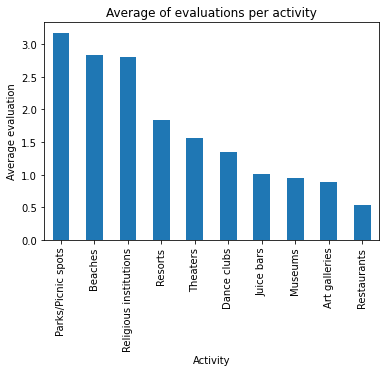

In [ ]:
sorted_means.plot(kind='bar')
plt.title('Average of evaluations per activity')
plt.xlabel('Activity')
plt.ylabel('Average evaluation')
plt.show()

The above code calculates the average of the evaluations for each column in the dataset. If a place has a higher average rating than the others, it might be considered more popular among users. At first place we find Parks/Picnic spots (most appreciated), followed by Beaches and Religious Institutions. 

In [ ]:
variances = df.var(axis=0) #Calculation of the variance of the ratings
sorted_variances = variances.sort_values(ascending=False)
print(sorted_variances)

Juice bars                0.621901
Resorts                   0.291101
Dance clubs               0.228752
Museums                   0.191345
Theaters                  0.132955
Art galleries             0.106872
Religious institutions    0.103285
Restaurants               0.078250
Beaches                   0.018908
Parks/Picnic spots        0.000061
dtype: float64


<ipython-input-17-edef726b484c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = df.var(axis=0) #Calculation of the variance of the ratings


The above code shows the activities or places with the highest variance of ratings, so those for which user ratings vary the most. This information can be useful to understand which activities or places might be less valued or more inclined to discordant opinions among users.

In [ ]:
corr_matrix=df.corr()
print(corr_matrix['Art galleries'].sort_values(ascending=False))

Art galleries             1.000000
Resorts                   0.094142
Restaurants               0.073456
Religious institutions    0.050700
Beaches                   0.020029
Juice bars                0.008613
Parks/Picnic spots       -0.012474
Theaters                 -0.047313
Museums                  -0.100483
Dance clubs              -0.187692
Name: Art galleries, dtype: float64


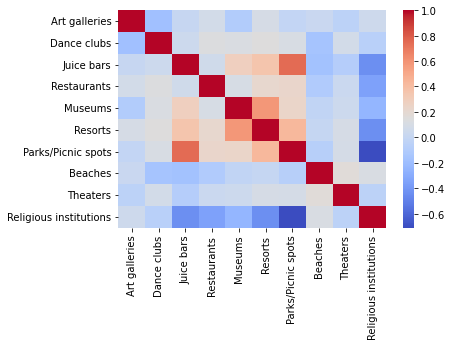

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr_matrix, cmap='coolwarm')           #The intensity of each color represents the strength of the correlation between two variables.
plt.show()

To continue our analysis, here we used the correlation analysis to calculate the correlation between the different columns of the dataset and so identifying the columns with the strongest correlation. Here, all columns are sorted in descending order of correlation, and we can observe that the three features with the highest correlation value are Art galleries, Resorts and Restaurants. So, the majority of users prefer to do these activities.
Regarding instead the results with negative correlation, this could indicate that the individual has a preference between the two activities. For example, if a user rates his/her experience in theaters versurs art galleries (high positive correlation), a negative correlation could mean that the individual prefers to go to an art galleries rather than to the theater. This could be due to multiple factors, such as the user's expectations, past experience, the sorrounding environment and general perception of the experience.


In [ ]:
min_value = df.min()
print (min_value)


User ID                   User 1
Art galleries               0.34
Dance clubs                  0.0
Juice bars                  0.13
Restaurants                 0.15
Museums                     0.06
Resorts                     0.14
Parks/Picnic spots          3.16
Beaches                     2.42
Theaters                    0.74
Religious institutions      2.14
dtype: object


In [ ]:
max_value = df.max()
print (max_value)

User ID                   User 99
Art galleries                3.22
Dance clubs                  3.64
Juice bars                   3.62
Restaurants                  3.44
Museums                       3.3
Resorts                      3.76
Parks/Picnic spots           3.21
Beaches                      3.39
Theaters                     3.17
Religious institutions       3.66
dtype: object


Regarding min and max, we can see for example that the minimum value of the "Dance clubs" column is 0, indicating that some users did not indicate interest in dance clubs, while the maximum is 3.64. Or, it can be seen that the maximum value of the "Religious institutions" column is 3.66, indicating that some users expressed a strong interest in religious institutions, while the minimum value of the same column is 2.14, indicating that there are also users not really interest in them. 


In [ ]:
mode = df[['Art galleries', 'Dance clubs', 'Juice bars', 'Restaurants', 'Museums', 'Resorts','Parks/Picnic spots', 'Beaches', 'Theaters', 'Religious institutions']].mode()
print(mode.round(decimals=2))

   Art galleries  Dance clubs  Juice bars  Restaurants  Museums  Resorts  \
0            0.7          1.2        0.22          0.5     0.82      1.7   
1            NaN          NaN         NaN          NaN      NaN      NaN   

   Parks/Picnic spots  Beaches  Theaters  Religious institutions  
0                3.18     2.86      1.41                    2.46  
1                 NaN      NaN       NaN                    2.54  


The mode indicates the most frequent value in a dataset. In this case, it indicates which is the most common value for each activity. For example, in the column "Art galleries" the most common value (mode) is 0.7: it means that among all the users who rated the activities, the majority gave a score of 0.7.

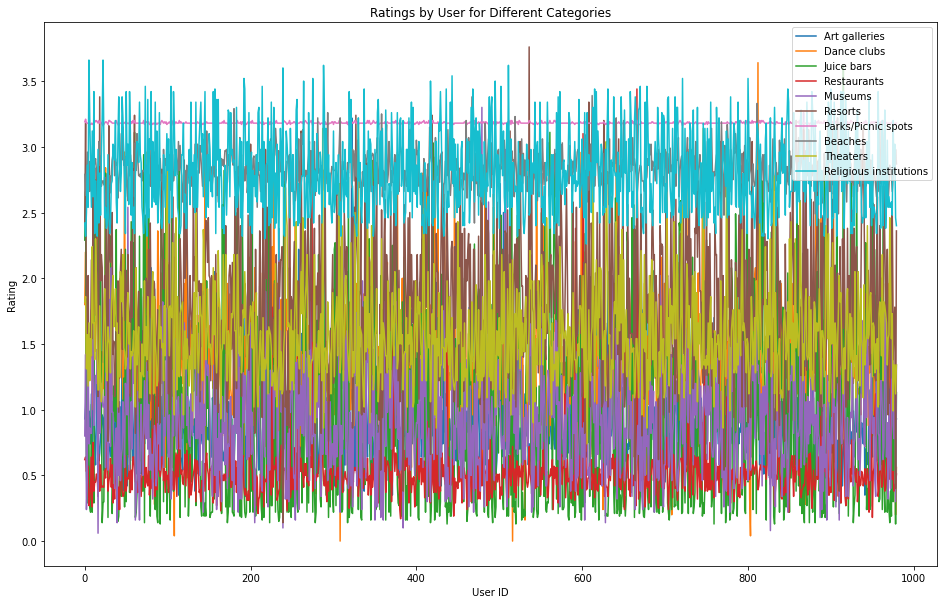

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
for column in df.columns[1:]:
    plt.plot(df[column], label=column)


plt.legend()
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title('Ratings by User for Different Categories')
plt.show()

We generated the above line graph to visualize the reviews of users about the different activities. The lines represent the different activities and would be drawn in such a way as to show the differences in valuation between the activities. Because there are many data points, the line plot results crowded and difficult to read. For this reason, we proceeded to use dots instead.

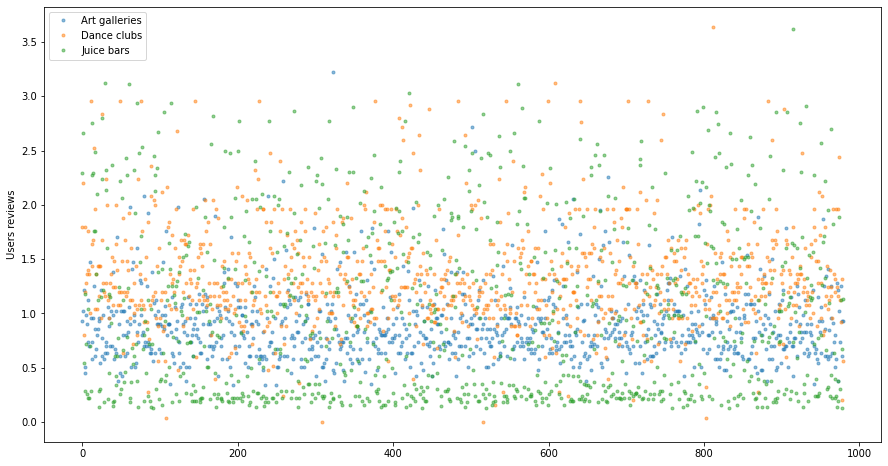

In [ ]:
axes = df[['Art galleries', 'Dance clubs', 'Juice bars']].plot(
    marker='.',
    alpha=0.5,
    linestyle='None',
    figsize=(15, 8), 
    subplots=False,
    ylabel='Users reviews')

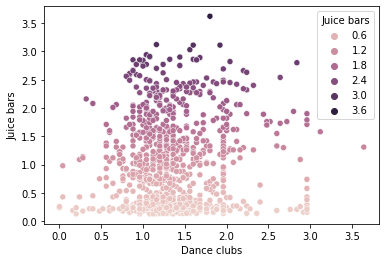

In [ ]:
sns.scatterplot(x='Dance clubs', y='Juice bars', hue='Juice bars', data=df)


plt.show()

Then, we decided to draw also a scatter plot putting together two complementary activities, in this case "Dance clubs" and "Juice bars". There could be people who prefer to dance and others just to hang out and drink something with friends.

The x-axis represents the reviews received by "Dance clubs" and the y-axis represents the reviews received by "Juice bars".
Each point in the scatter plot represents a different combination of reviews for the two activities. So, the graph is used to analyze whether there is a relationship among the reviews for the two activities and to identify any clusters of points that suggest a strong correlation between the reviews for the two activities.

In [ ]:
# Recommendation algorithm
import pandas as pd

def get_recommendations(user_id):
    """
    Returns the three activities most voted by the user
    and sorted in descending order.
    """
    user_data = df[df['User ID'] == user_id].iloc[:, 1:]

    user_ratings = list(user_data.values[0])

    # Creates a dictionary that associates each activity with the corresponding grade
    ratings_dict = dict(zip(user_data.columns, user_ratings))

    # Sort the dictionary in descending order of votes and select the first three activities
    top_activities = sorted(ratings_dict, key=ratings_dict.get, reverse=True)[:3]

    return top_activities

In [ ]:
get_recommendations('User 10')

['Parks/Picnic spots', 'Religious institutions', 'Beaches']

Finally, we used a recommendation algorithm to recommend the best activities, based on user ratings for various activity categories. In this case, the code takes a user's ID as input and returns a list of the three activities most voted by the user, sorted in descending order of votes. So, for User 10, the three top-rated activities are Parks/Picnic spots, Religious Institutions, Beaches. 

The recommendation algorithm here is used to find similar users based on their preferences. The algorithm works on the basis that users who have rated the same objects similarly are more likely to have similar tastes. Therefore, if a user has rated a set of objects that another user has rated positively, it is assumed that this user might also like other objects that the other user has rated positively.

### ADVANCED ANALYSIS
In this phase, we executed the chosen algorithms to study the data.

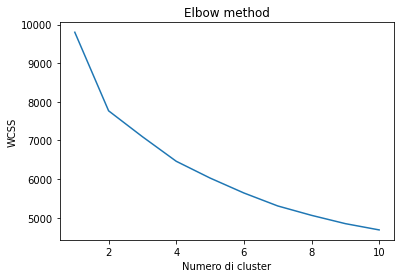

In [ ]:
# K-means clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns of the dataset containing user ratings, create a data matrix and normalise it
X = df.iloc[:, 1:].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

# We find the optimal number of clusters through the elbow method
wcss = [] # The sum of squared distance between each point and the centroid in a cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Numero di cluster')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


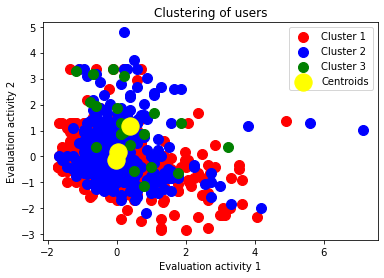

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clustering of users')
plt.xlabel('Evaluation activity 1')
plt.ylabel('Evaluation activity 2')
plt.legend()
plt.show()

First, the elbow method has been used to help the determination of the optimal number of clusters for our dataset. As we can observe in the first graph, the elbow curve seems to have an inflection point (elbow) at K=3. Therefore, we choose K=3 as the optimal number of clusters.

Then, the K-Means clustering technique has been used to group users according to their ratings and identify any groups of users with similar ratings.
The K-Means clustering technique divided the users into 3 groups (represented by the colours red, green and blue) based on their ratings. In particular, it appears that the blue group is composed of users who gave high ratings for all activities, while the red group appears to be composed of users who gave low or average ratings for all activities.

Finally, the centroids represent the centre of mass of each cluster. These are the points that minimise the sum of the squared distances from all points in the cluster. In our case, having chosen to use the K-means algorithm with K=3, we obtained three centroids representing the 'centres of mass' of the three clusters generated by the algorithm. Each centroid is represented by a vector of values indicating the average of the user ratings within the corresponding cluster.

General comment: cluster analysis could be useful to identify possible subgroups of users with similar preferences, which could be useful to create targeted marketing campaigns or to offer customers personalised experiences. 




In [ ]:
# Linear Regression 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

X = df[['Art galleries', 'Museums', 'Theaters']]
y = df['Religious institutions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

# Train the model using training data
reg.fit(X_train, y_train)

# Uses the model to make predictions about the dependent variable y using the independent variable X from the evaluation data
y_pred = reg.predict(X_test)

# Evaluates model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')

R²: 0.06
MSE: 0.10


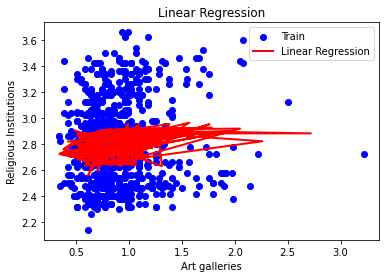

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['Art galleries'], y_train, color='blue', label='Train')

plt.plot(X_test['Art galleries'], y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Art galleries')
plt.ylabel('Religious Institutions')
plt.title('Linear Regression')

plt.legend()
plt.show()

We then used linear regression with the aim of predicting the evaluation of one activity based on user evaluations for other activities.

The linear regression produced a good model that is able to predict the valuation of one activity based on user valuations for other activities. The accuracy of the model was assessed using the coefficient of determination R-squared, which yielded a value of 0.06. This indicates that approximately 6% of the variation in the dependent variable (religious institutions) is explained by variations in the independent variables (user ratings for other activities: Art galleries, Museums, Theaters), a very low R-squared. 

In addition, the mean square error (MSE) indicates the average of the squared errors between the actual value (y_test) and the predicted value (y_pred) from the linear regression model. In other words, the MSE measures the mean square discrepancy between the actual values and those predicted by the model, so a lower MSE indicates a better fit of the model to the data.

Finally, the scatter plot between predicted and actual values shows a good correspondence between them, which suggests that the model is able to predict activity evaluations reliably. 

In [ ]:
# Linear Regression 2
X = df[['Dance clubs', 'Juice bars', 'Restaurants']]
y = df['Resorts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Evaluates model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R²: {r2:.2f}')
print(f'MSE: {mse:.2f}')

R²: 0.20
MSE: 0.26


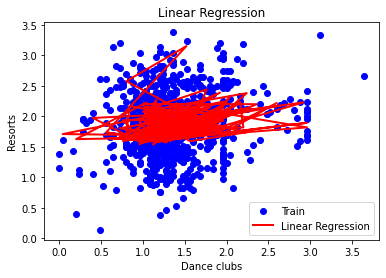

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train['Dance clubs'], y_train, color='blue', label='Train')

plt.plot(X_test['Dance clubs'], y_pred, color='red', linewidth=2, label='Linear Regression')

plt.xlabel('Dance clubs')
plt.ylabel('Resorts')
plt.title('Linear Regression')

plt.legend()
plt.show()

In this case, the coefficient of determination R-squared yielded a value of 0.20. This indicates that approximately 20% of the variation in the dependent variable (resorts) is explained by variations in the independent variables (user ratings for other activities: Dance clubs, Juice bars, Restaurants). 

In both the linear regression cases, this model has in general a poor ability to fit the data and explain the variance in the dependent variable as the R-squared is low.

### K-MEANS AND LINEAR REGRESSION COMPARISON
The comparison between the result of linear regression and that of clustering with k-means depends on the specific objective of the analysis.

If the objective is to predict future activity evaluations based on user evaluations for other activities, then linear regression may be the best choice as it provides a quantitative estimate of the evaluation based on other user evaluations. 

If, on the other hand, the objective is to identify clusters of users with similar ratings for activities, then clustering with k-means might be more appropriate, as it allows one to identify clusters of users with similar ratings for activities and to explore possible relationships between the clusters and other variables (if any), such as region of origin, gender or age.

In our case, we used the two algorithms for different objectives, as explained above.

## PCA
PCA (Principal Component Analysis) is a technique for reducing the dimensionality of a dataset while retaining most of the variation in the data. It is used to simplify complex datasets and to identify patterns in the data.

In the given dataset, there are 11 columns representing ratings of different categories by each user. If we apply PCA to this dataset, we can reduce the dimensionality of the dataset to a smaller number of principal components while retaining most of the variation in the original data. This can be useful for visualizing the data in a lower-dimensional space, identifying patterns and relationships among the variables, and reducing noise or redundancy in the data.

We can use PCA to identify which categories of ratings are most important in distinguishing between different users, or to identify groups of users who have similar preferences across different categories.

In [ ]:
# PCA
df = df.drop('User ID', axis=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
pca = PCA(n_components = 2)

pca.fit(df.values)

round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum() *100, decimals=2)

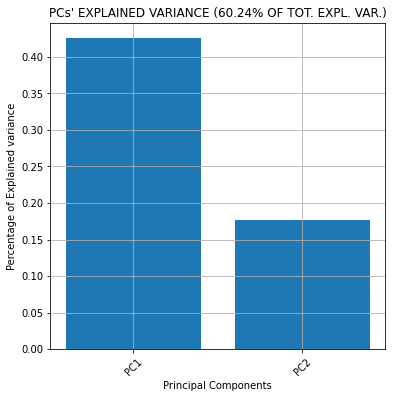

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1, 3), labels=[f'PC{i}' for i in range(1, 3)],rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()


The percentage of explained variance is a measure of how much of the original variability in the dataset is captured by each PC.

The output of this code indicates that the first PC captures around 35% of the total explained variance, while the second PC captures around 27% of the total explained variance. This means that the first PC is able to explain a larger proportion of the variability in our data, while the second PC explains a smaller proportion.

This information can be useful for understanding which features or variables in the data contribute the most to the overall variability.

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


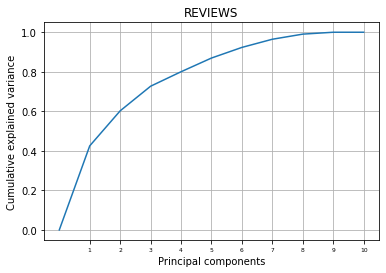

In [ ]:
pca_full = PCA()
pca_full.fit(df.values)
plt.figure()
plt.plot(np.insert(np.cumsum(pca_full.explained_variance_ratio_), 0, 0))
plt.title('REVIEWS')

plt.xticks(ticks=np.arange(1, pca_full.n_features_ + 1),
labels=[f'{i}' for i in range(1, pca_full.n_features_ + 1)])
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.xticks(fontsize = 6)
plt.grid()
plt.show()



This code performs PCA on the entire dataset and computes the cumulative explained variance for each principal component. The PCA model is created using the PCA() function from the sklearn.decomposition module and is fitted to the data using the fit() method. The cumulative explained variance is computed using the explained_variance_ratio_ attribute of the PCA object and is plotted against the principal component number using the plot() function from the matplotlib.pyplot module.

The resulting plot shows how much of the total variance in the data is explained by each principal component, as well as the cumulative explained variance for all the principal components. This information can be used to determine how many principal components are needed to capture a certain amount of variance in the data.

## CONCLUSION
From the analysis of the dataset, it can be concluded that users have varying preferences for different types of activities. The most popular ones include Parks/Picnic spots, Beaches, Religious institutions and Resorts.

It can also be observed that some users have highly diversified interests, as indicated by their high scores across multiple categories. On the other hand, some users seem to have specific preferences, as indicated by their high scores in only one or two categories.

Overall, the dataset provides valuable insights into user preferences for activities and experiences, which can be useful for businesses in the entertainment and hospitality industries in personalizing their offerings to meet the needs of their customers.

We want to conclude by adding that the analysis of this dataset was challenging, because it was the first time we performed something similar, but we did our best to properly analyze it using different algorithms and setting different objectives for each. Surely, it has been a valuable opportunity to better understand what studied in class.

## AUTHORS' CONTRIBUTION
G.B. and M.B. decided together the dataset on which perform the analysis. Then, G.B. has imported the dataset and done the pre-processing and data description.
Going on, M.B. has done the preliminary investigation.

Regarding the advanced analysis, G.B. and M.B. worked together on the chosen algorithms. The same occured for the interpretation of results for which G.B. and M.B. collaborated. 

G.B. wrote the abstract, whereas M.B. the conclusion.

## BIBLIOGRAPHY


*   Lectures' notes
*   scikit-learn
*   predictivehacks.com
*  YouTube videos



